<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خط پردازی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ما در بسیاری از ابزارهای متنی با کاربردهای مشهوری مثل بولد کردن و... آشنا شدیم. در این تمرین قصد داریم تا خودمان این عملیاتها را روی تصویر ورودی که یک کلمه فارسی است با استفاده از تبدیلات هندسی اعمال کنیم.
</font>
</p>

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا تصویر زیر را بصورت خاکستری وارد کنید.
<br>
Data/quera.png
</font>
</p>

In [98]:
img = cv2.imread('Data/quera.png', cv2.IMREAD_GRAYSCALE)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: Italic Text
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا میخواهیم متن را به یک متن italic تبدیل کنیم. برای اینکار از تبدیل برش یا shearing استفاده میکنیم. برای این تبدیل ماتریس تبدیل را به شکل زیر مقداردهی کنید.
</font>
</p>

$$\begin{bmatrix} 1 & 0.6 & 0 \\ 0 & 1 & 0 \end{bmatrix}$$

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 باید اندازه تصویر را پس از تبدیل به شکلی تغییر دهید بطوریکه تمام اجزا پس از تبدیل در تصویر قابل دیدن باشند. اگر ابعاد تصویر را در ماتریس تبدیل ضرب کند، سایز تصویر جدید بدست خواهد آمد.
<br>
همچنین بخش های جدیدی به تصویر اضافه میشوند که رنگ آنها در حالت عادی سیاه است. دقت کنید که حتما رنگ پیش زمینه باید سفید باشد. برای سفید کردن رنگ پیش زمینه درباره پارامتر borderValue تحقیق کنید.
<br>
تصویر حاصل را به شکل RGB با نام زیر ذخیره کنید:
<br>
italic_quera.png
</font>
</p>


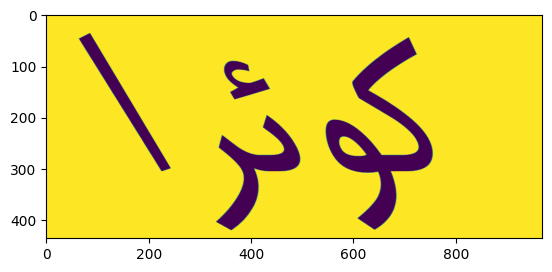

True

In [99]:
tr_matrix = np.array([[1, 0.6, 0], [0, 1, 0]])
height, width = img.shape[:2]
new_height = height
new_width = width + 0.6 * height
img_tr = cv2.warpAffine(img, tr_matrix, dsize=(int(new_width), int(new_height)),borderValue=(255, 255, 255), borderMode=cv2.BORDER_CONSTANT)
plt.imshow(img_tr), plt.show()
img_tr = cv2.cvtColor(img_tr, cv2.COLOR_GRAY2BGR)
cv2.imwrite('italic_quera.png', img_tr)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: بزرگ کردن اندازه متن
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 scaling انجام می دهند. شما با استفاده از ماتریس زیر، متن را بزرگتر کنید.
 در بسیاری از ابزارهای متنی شما قابلیت این را دارید که اندازه متن خود را تغییر دهید. این کار با استفاده از تبدیل
</font>
</p>

$$\begin{bmatrix} 4 & 0 & 0 \\ 0 & 4 & 0 \end{bmatrix}$$

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 باید اندازه تصویر را پس از تبدیل به شکلی تغییر دهید بطوریکه تمام اجزا پس از تبدیل در تصویر قابل دیدن باشند. اگر ابعاد تصویر را در ماتریس تبدیل ضرب کند، سایز تصویر جدید بدست خواهد آمد.
<br>
همچنین بخش های جدیدی به تصویر اضافه میشوند که رنگ آنها در حالت عادی سیاه است. دقت کنید که حتما رنگ پیش زمینه باید سفید باشد. برای سفید کردن رنگ پیش زمینه درباره پارامتر borderValue تحقیق کنید.
<br>
تصویر حاصل را به شکل RGB با نام زیر ذخیره کنید:
<br>
scaling_quera.png
</font>
</p>

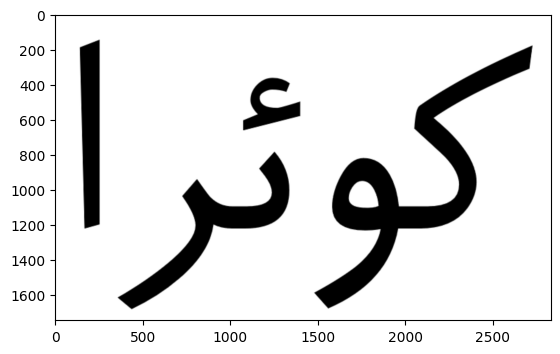

True

In [100]:
scaling_matrix = np.array([[4, 0, 0], [0, 4, 0]], dtype=np.float32)
new_height, new_width = img.shape[:2]
new_height = int(new_height * 4)
new_width = int(new_width * 4)
img_scaled = cv2.warpAffine(img, scaling_matrix,dsize=(new_width, new_height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
img_scaled = cv2.cvtColor(img_scaled, cv2.COLOR_GRAY2BGR)
plt.imshow(img_scaled), plt.show()
cv2.imwrite('scaling_quera.png', img_scaled)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: ایجاد فاصله
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال میخواهیم تصویر را از جهت افقی و عمودی جابجا کنیم. این کار همانند این است که از بالا و سمت چپ به تصویر space اضافه کنیم.
</font>
</p>

$$\begin{bmatrix} 1 & 0 & 200 \\ 0 & 1 & 200 \end{bmatrix}$$

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 باید اندازه تصویر را پس از تبدیل به شکلی تغییر دهید بطوریکه تمام اجزا پس از تبدیل در تصویر قابل دیدن باشند. اگر ابعاد تصویر را در ماتریس تبدیل ضرب کند، سایز تصویر جدید بدست خواهد آمد.
<br>
همچنین بخش های جدیدی به تصویر اضافه میشوند که رنگ آنها در حالت عادی سیاه است. دقت کنید که حتما رنگ پیش زمینه باید سفید باشد. برای سفید کردن رنگ پیش زمینه درباره پارامتر borderValue تحقیق کنید.
<br>
تصویر حاصل را به شکل RGB با نام زیر ذخیره کنید:
<br>
spacing_quera.png
</font>
</p>

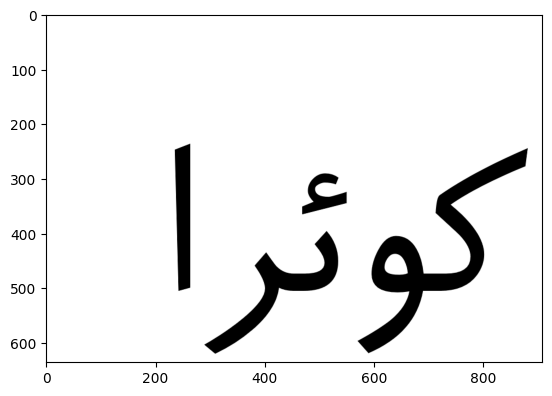

True

In [101]:
space_matrix = np.array([[1, 0, 200], [0, 1, 200]], dtype=np.float32)
height, width = img.shape[:2]
new_height = int(height + 200)
new_width = int(width + 200)
img_space = cv2.warpAffine(img, space_matrix,dsize=(new_width, new_height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
img_space = cv2.cvtColor(img_space, cv2.COLOR_GRAY2BGR)
plt.imshow(img_space), plt.show()
cv2.imwrite('spacing_quera.png', img_space)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [102]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "italic_quera.png", "scaling_quera.png", "spacing_quera.png"]
compress(file_names)

File Paths:
['notebook.ipynb', 'italic_quera.png', 'scaling_quera.png', 'spacing_quera.png']
